# 資料清理

In [1]:
import yfinance as yf
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.momentum import StochasticOscillator

# 獲取台積電股票的歷史數據
df = yf.Ticker("1789.TW").history(period="max")

# 計算技術指標
df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")

df.info()


C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2854 entries, 2011-09-29 00:00:00+08:00 to 2023-06-02 00:00:00+08:00
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       2854 non-null   float64
 1   High                       2854 non-null   float64
 2   Low                        2854 non-null   float64
 3   Close                      2854 non-null   float64
 4   Volume                     2854 non-null   int64  
 5   Dividends                  2854 non-null   float64
 6   Stock Splits               2854 non-null   float64
 7   volume_adi                 2848 non-null   float64
 8   volume_obv                 2854 non-null   int64  
 9   volume_cmf                 2752 non-null   float64
 10  volume_fi                  2841 non-null   float64
 11  volume_em                  2839 non-null   float64
 12  volume_sma_em              2696 non-null   float64
 13  

In [2]:
# 選擇要保留的指標
selected_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast']

# 刪除其他指標
df = df[selected_columns]

# 打印結果
print(df)

                                Open       High        Low      Close   
Date                                                                    
2011-09-29 00:00:00+08:00  32.602832  32.843065  31.538950  31.538950  \
2011-09-30 00:00:00+08:00  31.538950  31.916459  29.170956  29.994606   
2011-10-03 00:00:00+08:00  28.827770  28.827770  26.768644  26.768644   
2011-10-04 00:00:00+08:00  26.082266  28.827766  26.047947  28.827766   
2011-10-05 00:00:00+08:00  28.827768  28.827768  27.317743  27.592295   
...                              ...        ...        ...        ...   
2023-05-29 00:00:00+08:00  26.100000  26.250000  26.049999  26.200001   
2023-05-30 00:00:00+08:00  26.200001  26.200001  26.000000  26.049999   
2023-05-31 00:00:00+08:00  26.100000  26.350000  26.049999  26.049999   
2023-06-01 00:00:00+08:00  26.100000  26.250000  26.049999  26.100000   
2023-06-02 00:00:00+08:00  26.150000  26.400000  26.150000  26.400000   

                             Volume  trend_macd_di

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2854 entries, 2011-09-29 00:00:00+08:00 to 2023-06-02 00:00:00+08:00
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             2854 non-null   float64
 1   High             2854 non-null   float64
 2   Low              2854 non-null   float64
 3   Close            2854 non-null   float64
 4   Volume           2854 non-null   int64  
 5   trend_macd_diff  2821 non-null   float64
 6   trend_ema_fast   2843 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 178.4 KB


In [4]:
# 將索引視為日期欄位
df['Date'] = df.index

# 將"Date"欄位移至第一欄
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast']]


# 計算KD值
KD = ta.momentum.StochasticOscillator(
    close=df['Close'],
    high=df['High'],
    low=df['Low'],
    window=14,
    smooth_window=3,
    fillna=False
)
df['KD'] = KD.stoch()  # 取得KD值的陣列

# 使用ta套件中的RSIIndicator指標計算RSI值
rsi = ta.momentum.RSIIndicator(
    close=df['Close'],
    window=14,
    fillna=False
).rsi()

# 將計算出的RSI值合併到原始DataFrame中
df['RSI'] = rsi

# 過濾出2022年到2023年2月的資料
start_date = '2022-01-01'
end_date = '2023-02-28'
dfmodel = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]




df = df.round(3) 

df = df.reset_index(drop=True)

print(dfmodel)

                                               Date       Open       High   
Date                                                                        
2022-01-03 00:00:00+08:00 2022-01-03 00:00:00+08:00  24.236875  24.236875  \
2022-01-04 00:00:00+08:00 2022-01-04 00:00:00+08:00  23.942499  24.089686   
2022-01-05 00:00:00+08:00 2022-01-05 00:00:00+08:00  23.893437  23.991563   
2022-01-06 00:00:00+08:00 2022-01-06 00:00:00+08:00  23.942499  23.991563   
2022-01-07 00:00:00+08:00 2022-01-07 00:00:00+08:00  23.844375  23.893438   
...                                             ...        ...        ...   
2023-02-20 00:00:00+08:00 2023-02-20 00:00:00+08:00  25.900000  26.200001   
2023-02-21 00:00:00+08:00 2023-02-21 00:00:00+08:00  26.150000  26.350000   
2023-02-22 00:00:00+08:00 2023-02-22 00:00:00+08:00  26.100000  26.100000   
2023-02-23 00:00:00+08:00 2023-02-23 00:00:00+08:00  25.900000  26.500000   
2023-02-24 00:00:00+08:00 2023-02-24 00:00:00+08:00  26.350000  26.400000   

In [5]:
dfmodel.tail(60)

,Date,Open,High,Low,Close,Volume,trend_macd_diff,trend_ema_fast,KD,RSI
Date,,,,,,,,,,
2022-11-22 00:00:00+08:00,2022-11-22 00:00:00+08:00,24.600000,24.850000,24.299999,24.299999,742631,0.104629,24.233298,59.259186,51.110921
2022-11-23 00:00:00+08:00,2022-11-23 00:00:00+08:00,24.299999,24.650000,24.250000,24.500000,682650,0.099806,24.274329,74.074053,53.929550
2022-11-24 00:00:00+08:00,2022-11-24 00:00:00+08:00,24.700001,24.700001,24.299999,24.299999,553000,0.079372,24.278278,44.999886,50.776892
2022-11-25 00:00:00+08:00,2022-11-25 00:00:00+08:00,24.400000,24.500000,23.900000,24.000000,803550,0.043663,24.235466,14.999962,46.395620
2022-11-28 00:00:00+08:00,2022-11-28 00:00:00+08:00,23.850000,24.200001,23.549999,24.100000,454298,0.025679,24.214625,42.307743,48.006090
2022-11-29 00:00:00+08:00,2022-11-29 00:00:00+08:00,23.850000,24.100000,23.700001,23.950001,594653,0.003735,24.173914,30.769321,45.784109
2022-11-30 00:00:00+08:00,2022-11-30 00:00:00+08:00,23.900000,24.150000,23.900000,24.150000,538338,0.002786,24.170235,46.153835,49.162794
2022-12-01 00:00:00+08:00,2022-12-01 00:00:00+08:00,24.200001,24.350000,24.049999,24.200001,865422,0.005467,24.174814,50.000073,50.001701
2022-12-02 00:00:00+08:00,2022-12-02 00:00:00+08:00,24.200001,24.750000,24.200001,24.700001,864319,0.038989,24.255612,88.461578,57.546094


# 模型建構

### SVR

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta

# SVR
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]
C_values = [0.1, 1.0, 10.0]
epsilon_values = [0.1, 0.2, 0.5]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for C in C_values:
        for epsilon in epsilon_values:
            model = SVR(C=C, epsilon=epsilon)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((C, epsilon, avg_score))
    
    # 選擇最佳參數
    best_C, best_epsilon, _ = min(scores, key=lambda x: x[2])
    
    model = SVR(C=best_C, epsilon=best_epsilon)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.1
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'C': best_C, 'epsilon': best_epsilon}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_SVR = SVR(C=best_params['C'], epsilon=best_params['epsilon'])
model_SVR.fit(X, y)


最佳参数: {'ratio': 90, 'C': 0.1, 'epsilon': 0.5}
最佳相对误差: 0.0 %


SVR(C=0.1, epsilon=0.5)

In [7]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_SVR = model_SVR.predict(input_data)

# 印出預測結果
print(predictions_SVR)

[24.5877186  24.56557358 24.57370203 24.54783207 24.495489   24.60099091
 24.45910095 24.51175654 24.48988972 24.62970738 24.6291869  24.67758418
 24.59984692 24.73329999 24.64902403 25.04381271 25.9921759  25.88492772
 26.28624018 25.38621946 25.72225156 26.1123912  26.28115702 24.83818931
 24.90588359 25.30562561 25.95988383 26.23016395 25.12061537 25.21508658
 24.80343884 24.70000078 24.79181385 24.54842472 24.56001953 24.74077559
 25.37257131 24.72190463 24.61584269 24.62599615 24.62604645 24.47669061
 24.89408552 25.10502301 24.79548019 25.31071195 24.85469623 25.046916
 24.70258369 24.73051928 24.77516745 25.26885731 24.56782161 24.44986139
 24.48372285 24.48677302 24.4986031  24.72366399 24.52735998 24.51792845
 24.70847895 24.49216461]


In [8]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_SVR = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_SVR = selected_data_SVR[['Date']]

selected_data_SVR['predictions_SVR'] = predictions_SVR

# 打印结果
print(selected_data_SVR)




                          Date  predictions_SVR
2790 2023-03-01 00:00:00+08:00        24.587719
2791 2023-03-02 00:00:00+08:00        24.565574
2792 2023-03-03 00:00:00+08:00        24.573702
2793 2023-03-06 00:00:00+08:00        24.547832
2794 2023-03-07 00:00:00+08:00        24.495489
...                        ...              ...
2847 2023-05-25 00:00:00+08:00        24.723664
2848 2023-05-26 00:00:00+08:00        24.527360
2849 2023-05-29 00:00:00+08:00        24.517928
2850 2023-05-30 00:00:00+08:00        24.708479
2851 2023-05-31 00:00:00+08:00        24.492165

[62 rows x 2 columns]


In [9]:
# 找到最低值和最高值的索引
min_index = selected_data_SVR['predictions_SVR'].idxmin()
max_index = selected_data_SVR['predictions_SVR'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_SVR.loc[min_index, 'Date']
max_date = selected_data_SVR.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_SVR.loc[min_index, 'predictions_SVR']
max_value = selected_data_SVR.loc[max_index, 'predictions_SVR']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-05-19 00:00:00+08:00
最低值： 24.449861385872463
最高值日期： 2023-03-27 00:00:00+08:00
最高值： 26.286240178511243


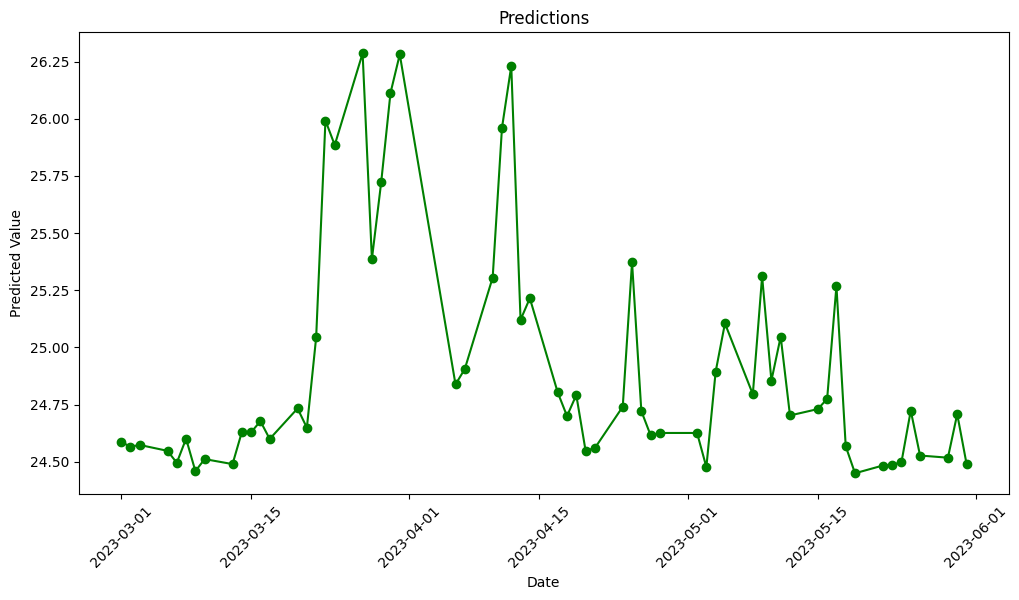

In [10]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['Date'], selected_data_SVR['predictions_SVR'], marker='o', color='green')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()

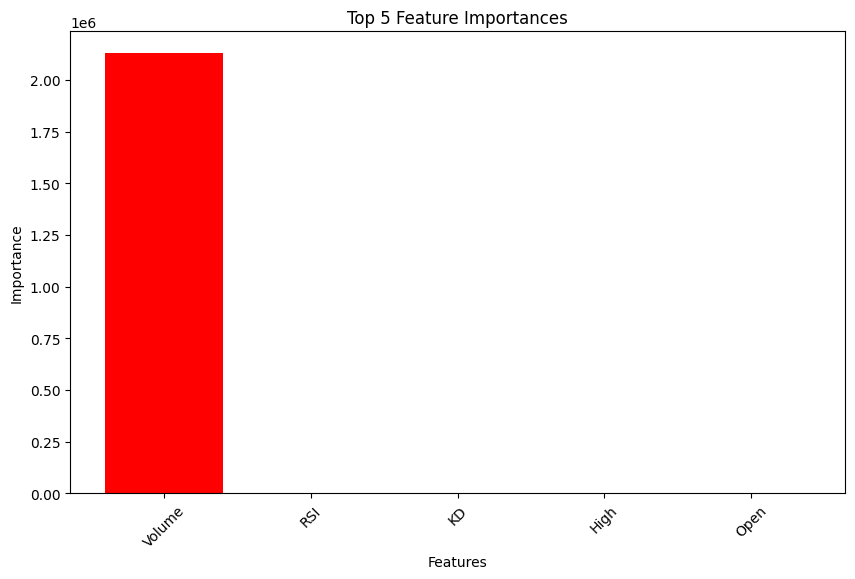

In [11]:
# 獲取支持向量（SV）的索引
support_vector_indices = model_SVR.support_

# 獲取支持向量對應的特徵
support_vectors = X.iloc[support_vector_indices]

# 計算支持向量的平均值作為特徵重要性
feature_importances = support_vectors.mean()

# 將特徵重要性排序
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# 取前N個重要特徵
top_n = 5
top_features = feature_importances_sorted.index[:top_n]
top_importances = feature_importances_sorted.values[:top_n]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


### randomforest

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import datetime
from dateutil.relativedelta import relativedelta

# Random Forest
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(5, 100, 5)]
n_estimator_values = [i for i in range(100, 250, 50)]
max_depth_values = [i for i in range(1, 5)]
min_samples_leaf_values = [i for i in range(1, 5)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    for max_depth in max_depth_values:
        for min_samples_leaf in min_samples_leaf_values:
            for n_estimators in n_estimator_values:
                model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=2023)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                average_value = np.mean(y_test)
                relative_error = (mse / average_value) * 100
                if relative_error < best_relative_error:
                    best_relative_error = relative_error
                    best_params = {'ratio': ratio, 'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error,'%')

# 將模型命名為 model
model_RF = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                              max_depth=best_params['max_depth'],
                              min_samples_leaf=best_params['min_samples_leaf'],
                              random_state=2023)
model_RF.fit(X, y)




最佳参数: {'ratio': 90, 'n_estimators': 150, 'max_depth': 4, 'min_samples_leaf': 4}
最佳相对误差: 0.004926856892707063 %


RandomForestRegressor(max_depth=4, min_samples_leaf=4, n_estimators=150,
                      random_state=2023)

In [13]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-15':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_RF = model_RF.predict(input_data)

# 印出預測結果
print(predictions_RF)

[24.51337186 24.54569257 24.27775209 24.51107151 24.27775209 24.01247529
 24.09620285 23.95845395 24.13926403 24.20142195 24.64596584 24.91301102
 24.20142195 24.61266786 24.51337186 25.15711107 26.45736152 27.18928237
 25.96139323 25.78821828 25.42674578 27.14504279 25.67833102 25.7384049
 26.13605476 25.82997458 27.24123321 26.49693668 25.81326782 25.82997458
 25.42674578 25.15711107 25.02593523 25.02593523 25.04975048 25.02593523
 25.46654464 25.41332332 25.2691084  25.46654464 25.61912136 25.42325936
 25.93371255 26.50612901 26.15407088 26.75525692 26.51827463 26.7207603
 26.8369083  26.71556453 26.69944537 25.81326782 25.78821828 25.95899677
 25.75038665 25.78821828 25.75038665 26.14497316 26.14497316 25.81326782
 26.42556351 26.14497316]


In [14]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_RF = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_RF = selected_data_RF[['Date']]

selected_data_RF['predictions_RF'] = predictions_RF

# 打印结果
print(selected_data_RF)


                          Date  predictions_RF
2790 2023-03-01 00:00:00+08:00       24.513372
2791 2023-03-02 00:00:00+08:00       24.545693
2792 2023-03-03 00:00:00+08:00       24.277752
2793 2023-03-06 00:00:00+08:00       24.511072
2794 2023-03-07 00:00:00+08:00       24.277752
...                        ...             ...
2847 2023-05-25 00:00:00+08:00       26.144973
2848 2023-05-26 00:00:00+08:00       26.144973
2849 2023-05-29 00:00:00+08:00       25.813268
2850 2023-05-30 00:00:00+08:00       26.425564
2851 2023-05-31 00:00:00+08:00       26.144973

[62 rows x 2 columns]


In [15]:
# 找到最低值和最高值的索引
min_index = selected_data_RF['predictions_RF'].idxmin()
max_index = selected_data_RF['predictions_RF'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_RF.loc[min_index, 'Date']
max_date = selected_data_RF.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_RF.loc[min_index, 'predictions_RF']
max_value = selected_data_RF.loc[max_index, 'predictions_RF']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)

最低值日期： 2023-03-10 00:00:00+08:00
最低值： 23.95845394673852
最高值日期： 2023-04-11 00:00:00+08:00
最高值： 27.241233211693473


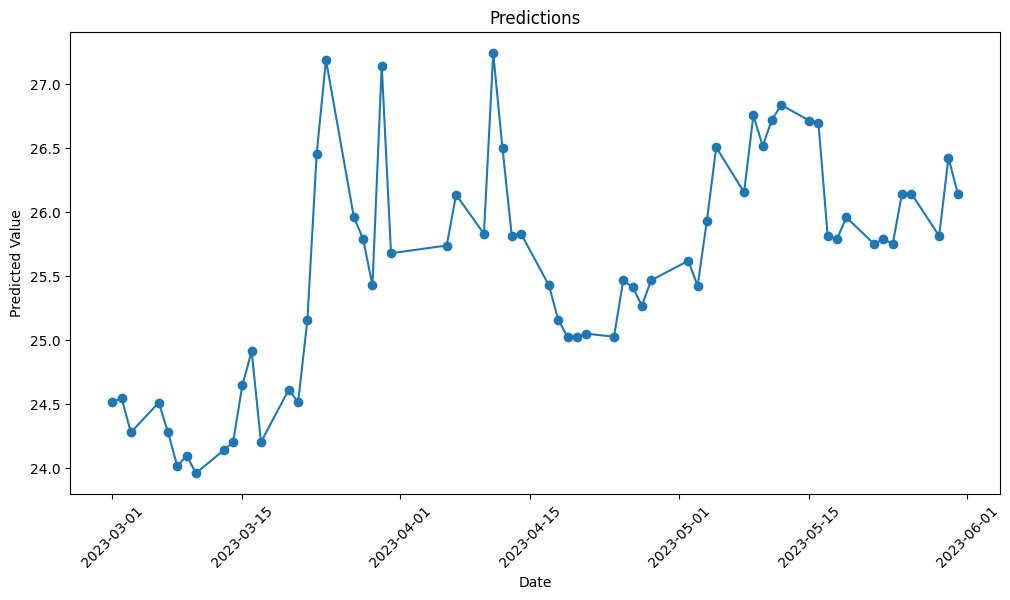

In [16]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_RF['Date'], selected_data_RF['predictions_RF'], marker='o')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



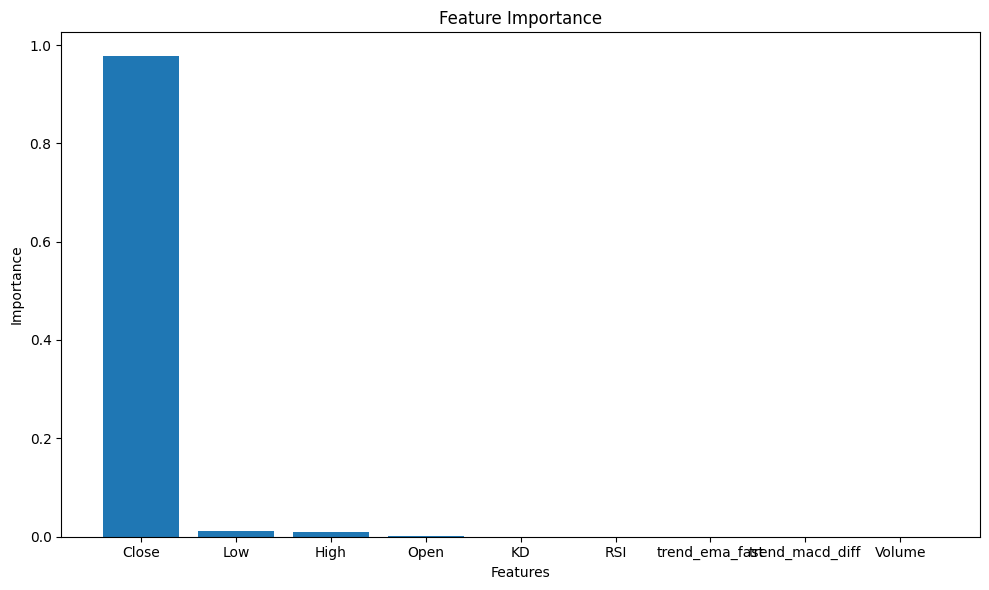

In [17]:
#看那些特徵比較重要，然後輸出前n重要的特徵

feature_importances = model_RF.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# 繪製長條圖
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names,)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### XGBoost

In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta


# XGBoost
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for max_depth in range(3, 7):
        for learning_rate in [0.1, 0.01]:
            model = xgb.XGBRegressor(max_depth=max_depth, learning_rate=learning_rate)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((max_depth, learning_rate, avg_score))
    
    # 選擇最佳參數
    best_max_depth, best_learning_rate, _ = min(scores, key=lambda x: x[2])
    
    model = xgb.XGBRegressor(max_depth=best_max_depth, learning_rate=best_learning_rate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.00001
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'max_depth': best_max_depth, 'learning_rate': best_learning_rate}

print("最佳參數:", best_params)
print("最佳相對誤差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_XG = xgb.XGBRegressor(max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'])
model_XG.fit(X, y)

最佳參數: {'ratio': 20, 'max_depth': 3, 'learning_rate': 0.01}
最佳相對誤差: 0.0 %


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_XG = model_XG.predict(input_data)

# 印出預測結果
print(predictions_XG)

[15.694879  15.716498  15.574968  15.694879  15.574968  15.463183
 15.479502  15.442884  15.516243  15.5363245 15.802272  15.95723
 15.5363245 15.738693  15.694879  16.135254  16.565145  16.565145
 16.565145  16.496677  16.307217  16.565145  16.42862   16.462711
 16.565145  16.548185  16.565145  16.565145  16.513874  16.548185
 16.307217  16.135254  16.036818  16.036818  16.056316  16.036818
 16.340466  16.252007  16.175434  16.340466  16.393976  16.270638
 16.565145  16.565145  16.565145  16.565145  16.565145  16.565145
 16.565145  16.565145  16.565145  16.513874  16.496677  16.565145
 16.479725  16.496677  16.479725  16.565145  16.565145  16.513874
 16.565145  16.565145 ]


In [20]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_XG = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_XG = selected_data_XG[['Date']]

selected_data_XG['predictions_XG'] = predictions_XG

# 打印结果
print(selected_data_XG)




                          Date  predictions_XG
2790 2023-03-01 00:00:00+08:00       15.694879
2791 2023-03-02 00:00:00+08:00       15.716498
2792 2023-03-03 00:00:00+08:00       15.574968
2793 2023-03-06 00:00:00+08:00       15.694879
2794 2023-03-07 00:00:00+08:00       15.574968
...                        ...             ...
2847 2023-05-25 00:00:00+08:00       16.565145
2848 2023-05-26 00:00:00+08:00       16.565145
2849 2023-05-29 00:00:00+08:00       16.513874
2850 2023-05-30 00:00:00+08:00       16.565145
2851 2023-05-31 00:00:00+08:00       16.565145

[62 rows x 2 columns]


In [21]:
# 找到最低值和最高值的索引
min_index = selected_data_XG['predictions_XG'].idxmin()
max_index = selected_data_XG['predictions_XG'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_XG.loc[min_index, 'Date']
max_date = selected_data_XG.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_XG.loc[min_index, 'predictions_XG']
max_value = selected_data_XG.loc[max_index, 'predictions_XG']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-03-10 00:00:00+08:00
最低值： 15.442884
最高值日期： 2023-03-23 00:00:00+08:00
最高值： 16.565145


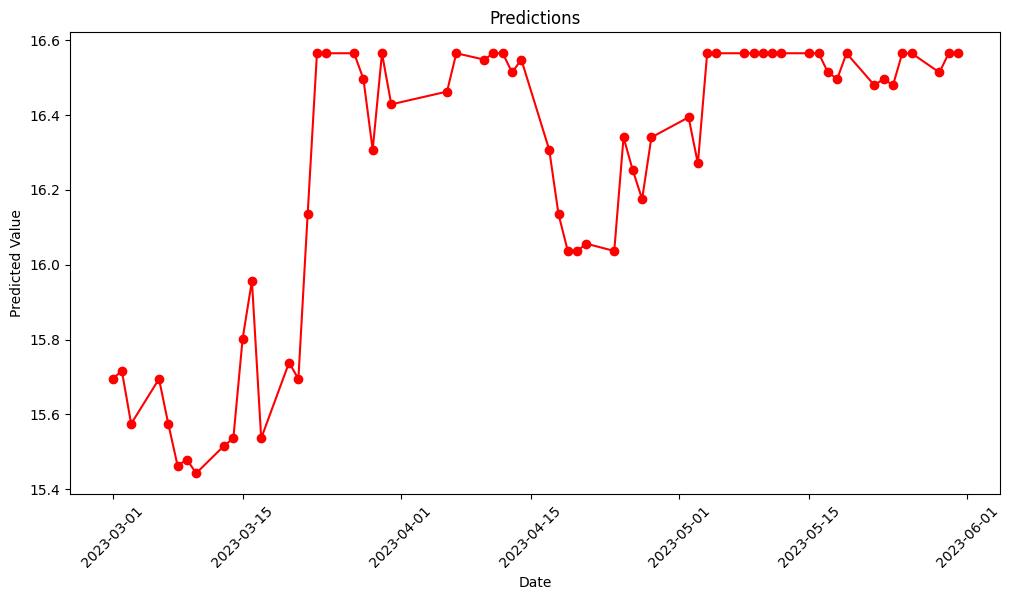

In [22]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_XG['Date'], selected_data_XG['predictions_XG'], marker='o', color='red')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



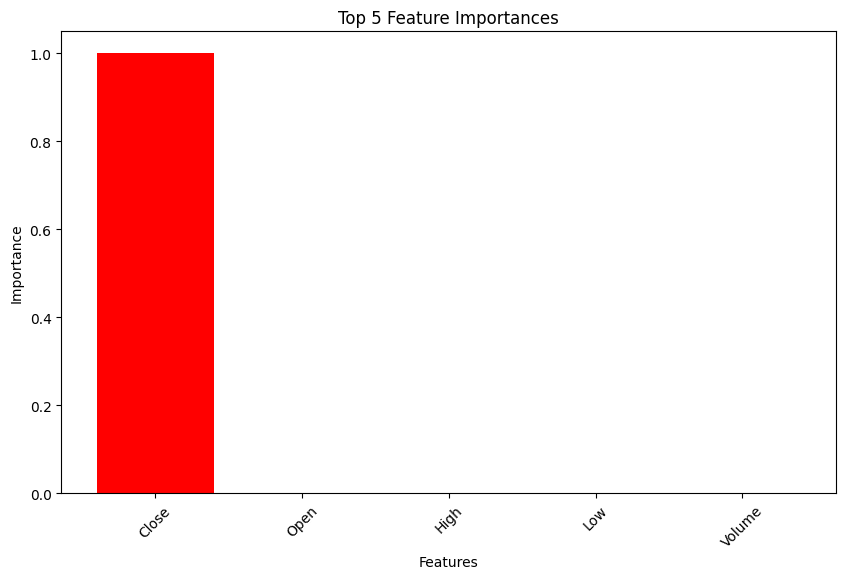

In [23]:
# 獲取特徵重要性
feature_importances = model_XG.feature_importances_

# 獲取特徵名稱
feature_names = X.columns

# 將特徵重要性與特徵名稱進行配對並排序
feature_importances_sorted = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# 取前N個重要特徵
top_n = 5
top_features = [f for f, _ in feature_importances_sorted[:top_n]]
top_importances = [imp for _, imp in feature_importances_sorted[:top_n]]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


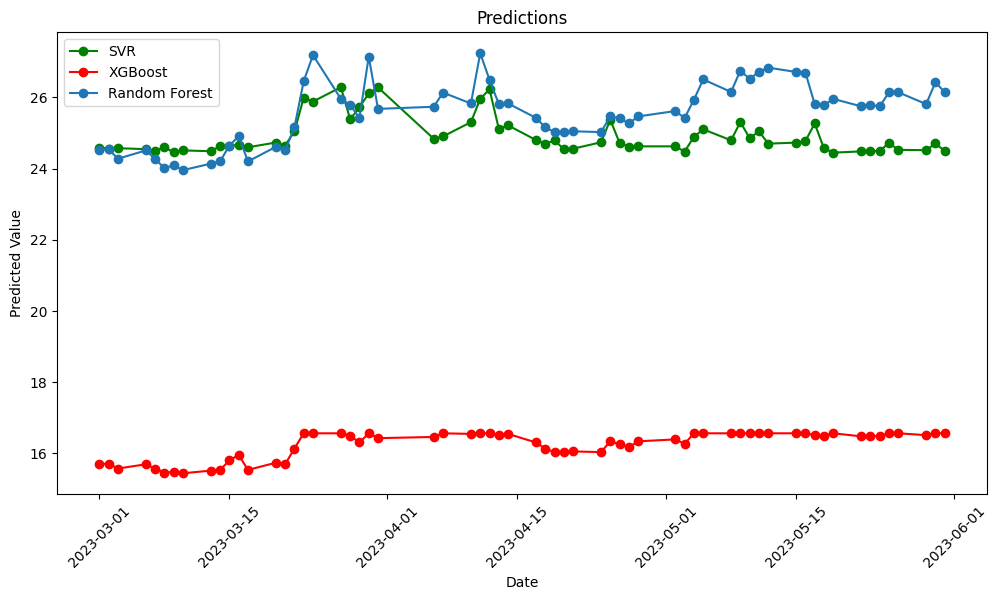

In [24]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['Date'], selected_data_SVR['predictions_SVR'], marker='o', color='green', label='SVR')
plt.plot(selected_data_XG['Date'], selected_data_XG['predictions_XG'], marker='o', color='red', label='XGBoost')
plt.plot(selected_data_RF['Date'], selected_data_RF['predictions_RF'], marker='o', label='Random Forest')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置图例
plt.legend()

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()
